Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps: a. Import the necessary packages b. Load the training and testing data c. Define the network architecture using Keras d. Train the model using SGD with 11 epochs e. Evaluate the network f. Plot the training loss and accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7080 - loss: 1.1357 - val_accuracy: 0.8992 - val_loss: 0.3759
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8968 - loss: 0.3776 - val_accuracy: 0.9147 - val_loss: 0.3064
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9097 - loss: 0.3183 - val_accuracy: 0.9230 - val_loss: 0.2735
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9184 - loss: 0.2907 - val_accuracy: 0.9300 - val_loss: 0.2512
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9268 - loss: 0.2632 - val_accuracy: 0.9339 - val_loss: 0.2339
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9320 - loss: 0.2412 - val_accuracy: 0.9383 - val_loss: 0.2186
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9377 - loss: 0.2180 - val_accuracy: 0.9417 - val_loss: 0.2069
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9423 - loss: 0.2052 -

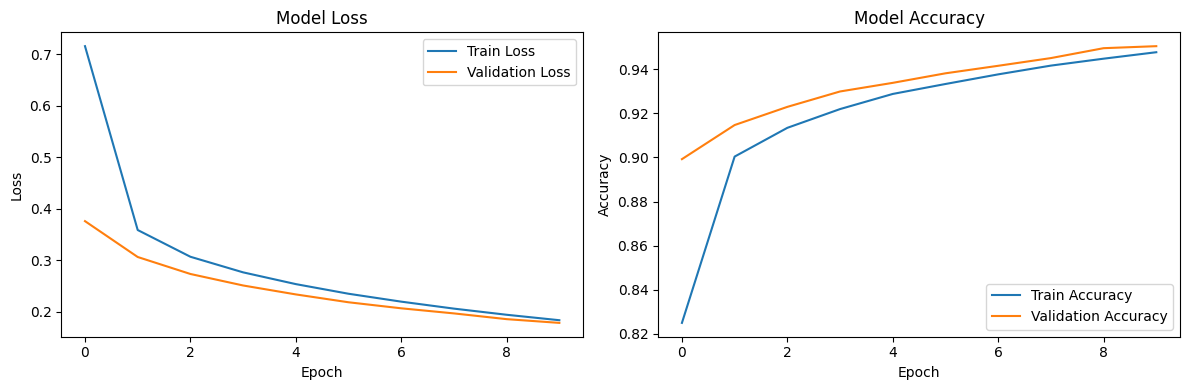

In [ ]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
# (mnist_train, mnist_test) = mnist.load_data()
# (X_train, y_train), (X_test, y_test) = mnist_train, mnist_test

mnist_train = pd.read_csv("mnist_train.csv")   # your own CSV
mnist_test  = pd.read_csv("mnist_test.csv")

y_train = mnist_train.iloc[:, 0].values
X_train = mnist_train.iloc[:, 1:].values
y_test = mnist_test.iloc[:, 0].values
X_test = mnist_test.iloc[:, 1:].values

# Preprocess
#They convert the raw pixel integers (0–255) into 32-bit floats in the range 0–1,
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# One-hot encode labels
#They convert integer class labels (0–9) into one‑hot vectors
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)
# Define the network architecture using Keras

model = Sequential()
  # relu introduces non-linearity, helps learn complex patterns
model.add(Dense(128, activation='relu', input_shape=(784,)))
#for probablity distribution over 10 classes
model.add(Dense(10, activation='softmax'))
# Train the model using SGD


#compares the model's softmax probability vector to one‑hot targets
#optimizer=SGD(): stochastic gradient descent optimizer (default lr=0.01, momentum=0.0). Controls how weights are updated from gradient
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Evaluate the network

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
# Plot the training loss and accuracy

plt.figure(figsize=(12, 4))

# Plot training

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

A Feedforward Neural Network (FNN) is a layered architecture where information flows strictly from input → hidden → output without cycles.

Each neuron computes a weighted sum of inputs and applies an activation function to introduce non-linearity.

MNIST images are flattened to a 784-dimensional input vector.

Hidden layers learn hierarchical feature representations using trainable weights and biases.

ReLU activation helps avoid vanishing gradient and speeds up convergence.

The output layer uses Softmax to convert raw logits into class-wise probability distribution.

One-hot encoding is required to match Softmax outputs in multi-class classification.

Training uses gradient descent (SGD) to minimize categorical cross-entropy loss.

Backpropagation computes gradients layer-by-layer and updates weights.

Training/validation loss and accuracy curves indicate learning behaviour, convergence, and overfitting.


1. Dense Layer

A fully connected layer where every neuron connects to all units in previous layer — used to learn global patterns.

2. Sequential() Model

Linear stack of layers — ideal for simple FNN architectures.

3. input_shape=(784,)

Specifies 784 input features — because the 28×28 image is flattened.

4. ReLU Activation

Outputs max(0, x) — avoids vanishing gradients and improves learning speed.

5. Softmax Activation

Converts outputs into class probabilities — necessary for multi-class classification.

6. SGD() Optimizer

Updates weights using stochastic gradient descent — simple, stable, good for small models.

7. categorical_crossentropy Loss

Measures difference between predicted probability distribution and one-hot label.

8. to_categorical()

Converts labels like 3 → [0 0 0 1 0 0 0 0 0 0] — required for multi-class softmax.

9. astype('float32') / 255.0

Normalizes pixel values to range 0–1 — ensures stable and fast training.

10. validation_split=0.2

Takes 20% of training data for validation — used to check generalization.

11. history.history['loss'] & accuracy

Stores training metrics per epoch — used to plot learning curves.

12. model.evaluate()

Computes final test loss and accuracy — shows real performance on unseen data.